# Stock Price Prediction — Workflow
This notebook demonstrates the full workflow for the project:
- Data ingestion from MySQL
- Preprocessing and train/test split
- LSTM model training / loading
- Prediction, evaluation, forecasting
- Visualization

Prerequisites:
- Create and activate the conda environment from `environments\environment.yml`.
- Execute pip install -e . to install all the class and methods defined
- Ensure MySQL table `iocl_clean` is prepared by running `iocl table prep.sql` and `iocl_cleaned.sql`.

In [1]:
# Project imports
from datasets.ingest import yf_to_sql
from features.data_cleaning import PreProcess
from models.keras_lstm import LSTMmodel
from features.evaluation import ErrorMetrics
from features.plot import ts_plot
from datasets.explore import EDA

Run the SQL preparatory script before proceeding:
- Open `code/datasets/iocl table prep.sql` (or the SQL file you used)
- Execute it in your MySQL client and execute `code/datasets/iocl_cleaned.sql` create the `iocl_clean` table.
The `yf_to_sql.ioc_data()` method will prompt you to confirm you've run it.

In [2]:
# Ingest / load processed IOC data from MySQL
yts = yf_to_sql()
stock_df = yts.ioc_data()   # this will prompt you to run the SQL
stock_df.head()

,close,log_close
date,,
2015-12-04,38.48,3.65
2015-12-05,38.48,3.65
2015-12-06,38.48,3.65
2015-12-07,38.51,3.65
2015-12-08,37.96,3.64


We scale close prices, build lookback sequences and split into train/test.
The `lookback_window` should match what the model expects (the model uses `lookback_window` = 60).

Decomposition of TimeSeries

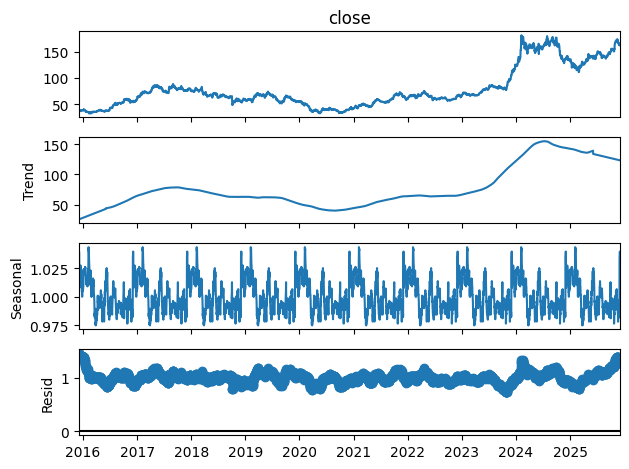

In [3]:
eda = EDA(stock_df)
eda.decomposition()

ACF & PACF

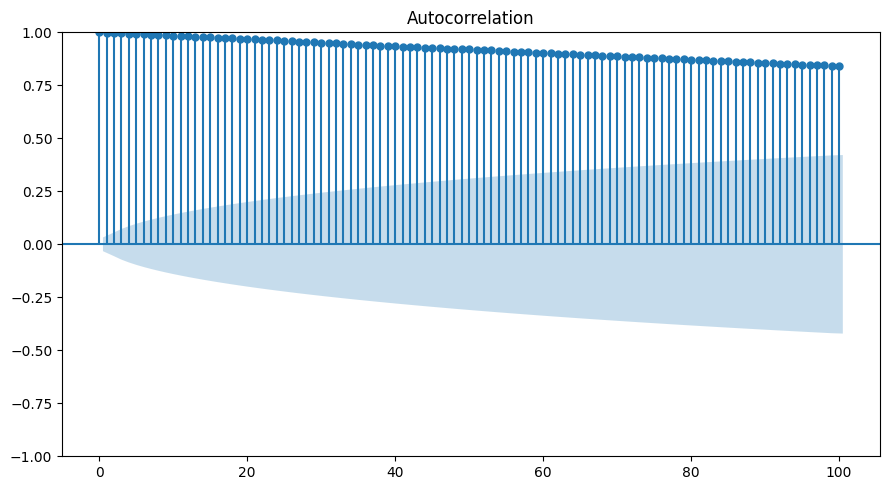

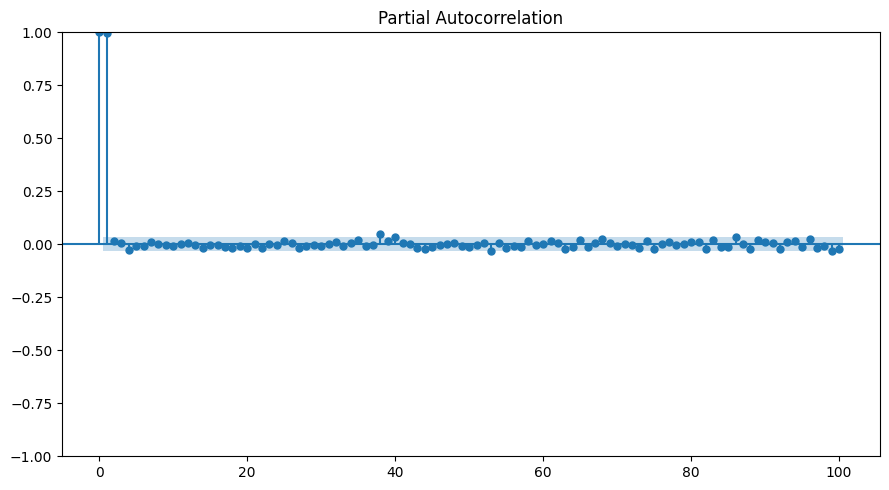

In [4]:
eda.acf_pacf(100)

Dicky fuller test
- H0: Non Stationary
- H1: Stationary

In [5]:
eda.adfuller_test()

Test statistic                   -0.323684
p-value                           0.922082
Lags Used                        19.000000
Number of Observations Used    3634.000000
dtype: float64

Degree of differencing

In [6]:
eda.deg_of_def()

The degree of differencing is 1


c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

In [3]:
pp = PreProcess(stock_df, split_by=0.85)
x_train, y_train, x_test, y_test, last_seq = pp.tt_split(lookback_window=60, reshape=True)

# Quick shape checks
print("x_train.shape:", getattr(x_train, 'shape', None))
print("y_train.shape:", getattr(y_train, 'shape', None))
print("x_test.shape:", getattr(x_test, 'shape', None))
print("y_test.shape:", getattr(y_test, 'shape', None))
print("last_seq.shape:", getattr(last_seq, 'shape', None))

x_train.shape: (3046, 60, 1)
y_train.shape: (3046,)
x_test.shape: (548, 60, 1)
y_test.shape: (548, 1)
last_seq.shape: (1, 60, 1)


Training can be slow. If you have a saved model already (`code/models/ioc_lstm_model.h5`), you can skip training.
Below we show the training call (which saves the model to `code/models/`).

In [5]:
model = LSTMmodel(x_train, y_train)

In [9]:
# To train:
model.train_and_save(batch_size=32, epochs=10, model_name="ioc_lstm_model.h5")

# If you want to skip training (model already saved), just instantiate and use the saved model

Epoch 1/10


c:\Users\amjit\miniconda3\envs\.conda\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0079
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.1730e-04
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3.1806e-04
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 3.3079e-04
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.6103e-04
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 2.5793e-04
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.3944e-04
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.8034e-04
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.8152e-04
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.8413e-04


Model saved to: ..\code\models\ioc_lstm_model.h5


In [6]:
# Make predictions (uses the saved model file name)
y_test_pred = model.predict(x_test, pp.scaler, "ioc_lstm_model.h5")

# Evaluate
em = ErrorMetrics(y_test, y_test_pred)
em.all()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
RMSE: 3.104949587618568
MSE: 9.640711941652716
MAE: 2.309438494939873
MAPE: 1.5923107112419377


In [7]:
# Forecast the next 7 trading days (or adjust n_days)
forecast = model.forecast(last_seq, pp.scaler, model_name="ioc_lstm_model.h5", n_days=7, latest_date=pp.latest_date)
forecast

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


,Predicted_Close
Date,
2025-12-05,163.763840
2025-12-06,164.084808
2025-12-07,164.461288
2025-12-08,164.868301
2025-12-09,165.291672
2025-12-10,165.723160
2025-12-11,166.158173


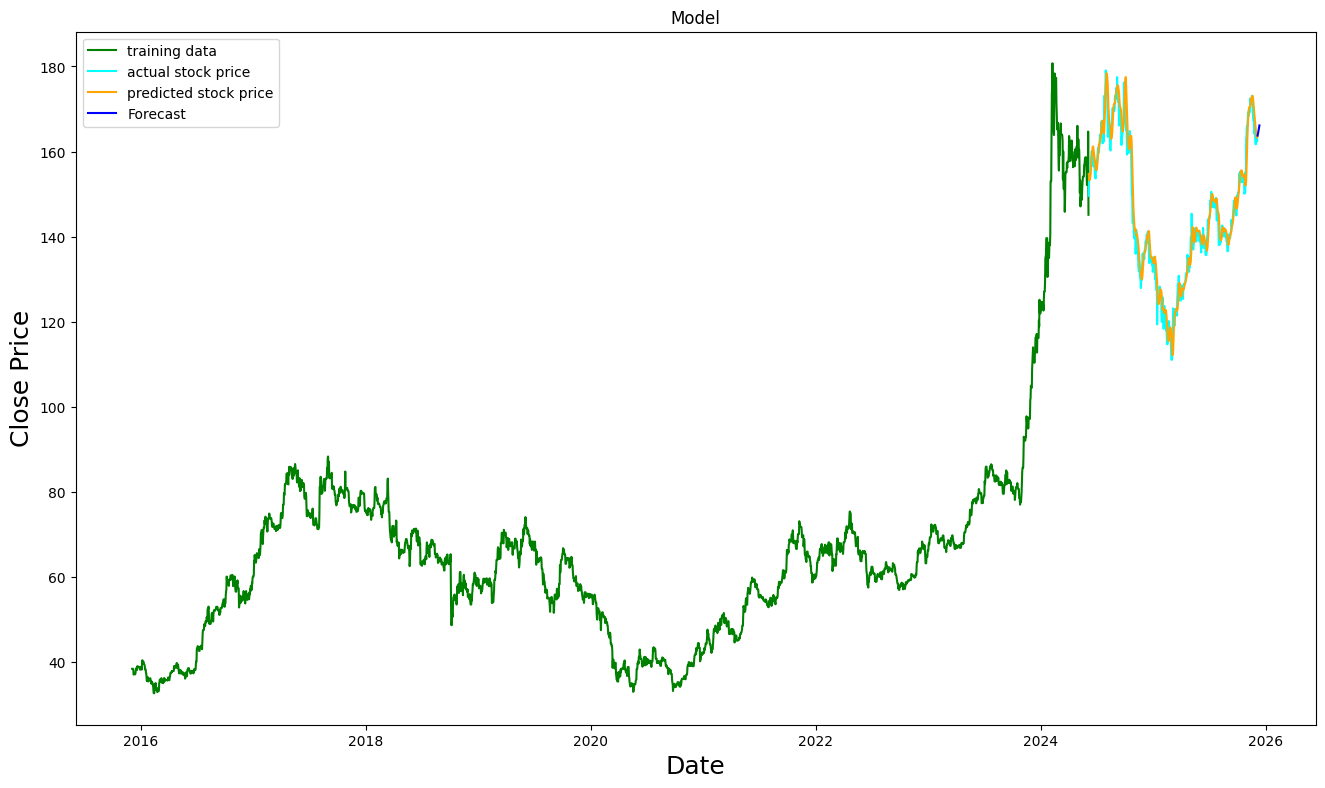

In [8]:
train_df, test_df = pp.train_test(y_test_pred)
ts_plot(train_df, test_df, forecast)

- Model file location:
  - Models are saved in the same folder as `keras_lstm.py` (i.e. `code/models/`).
  - If you see file-not-found errors, check `code/models/` for the `.h5` file and that you pass the correct `model_name`.